<a href="https://colab.research.google.com/github/ArquimedesG/Machine_Learning_Colabs/blob/main/ML_S4_MLP_Metrics_06JL23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Metrics Used to Evaluate a MLP Model Performance

In [ ]:
#  Importing matplotlib.pyplot
import matplotlib.pyplot as plt

# Importing Make Moons dataset from sklearn.datasets
from sklearn.datasets import make_moons

# Importing train_test_split to manage data (divide in train and test sets)
from sklearn.model_selection import train_test_split

# Importing MLPClassifier (MLP) from sklearn.neural_network
from sklearn.neural_network import MLPClassifier

# Importing accuracy_score, confusion_matrix, precision_score, recall_score,
# f1_score and classification_report from sklearn.metrics
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,recall_score, f1_score,classification_report)

### MakeMoons Dataset

The make_moons dataset is a swirl pattern, or two moons.

It is a set of points in 2D making two interleaving half circles.

It displays 2 disjunctive clusters of data in a 2-dimensional representation space ( with coordinates x1 and x2 for two features).

The areas are formed like 2 moon crescents.

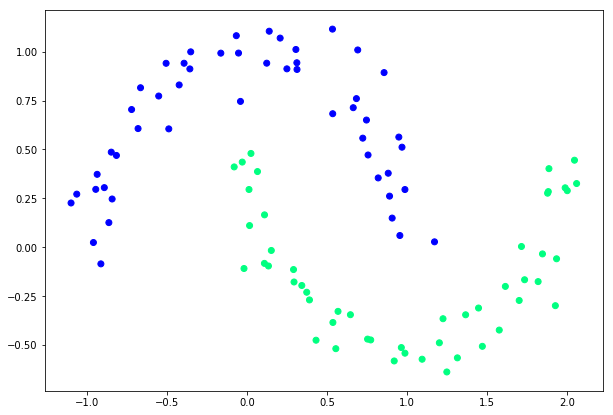

###  sklearn.datasets.make_moons

Make two interleaving half circles.

A simple toy dataset to visualize clustering and classification algorithms.

**Parameters:**

    n_samples : int or tuple of shape (2,), dtype=int, default=100
    If int, the total number of points generated.
    If two-element tuple, number of points in each of two moons.

    shuffle : bool, default=True
    Whether to shuffle the samples.

    noise : float, default=None
    Standard deviation of Gaussian noise added to the data.

    random_state : int, RandomState instance or None, default=None
    Determines random number generation for dataset shuffling and noise.
    Pass an int for reproducible output across multiple function calls.

**Returns:**

    X : ndarray of shape (n_samples, 2)
    The generated samples.

    y : ndarray of shape (n_samples,)
    The integer labels (0 or 1) for class membership of each sample.

In [ ]:
#  Creating two datasets x with 150 elements and y with 50 elements with make_moons method
x,y =make_moons(n_samples=(150,50))

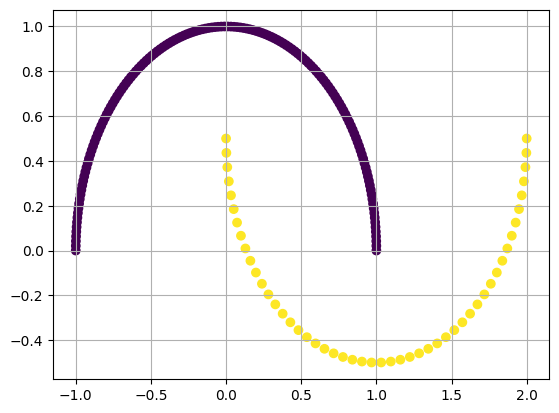

In [ ]:
#  Plotting both datasets
plt.scatter(x[:,0],x[:,1], c=y)
plt.grid()
plt.show()

In [ ]:
# Splitting the x and y datasets into test and train arrays
x_train,x_test,y_train,y_test= train_test_split(x,y)

### Multi-Layer Perceptron (MLP)

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function 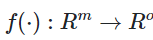 by training on a dataset, where *m* is the number of dimensions for input and *o* is the number of dimensions for output.

Given a set of features image.png and a target *y*, it can learn a non-linear function approximator for either classification or regression.

It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers.


The figure shows a one hidden layer MLP with scalar output.

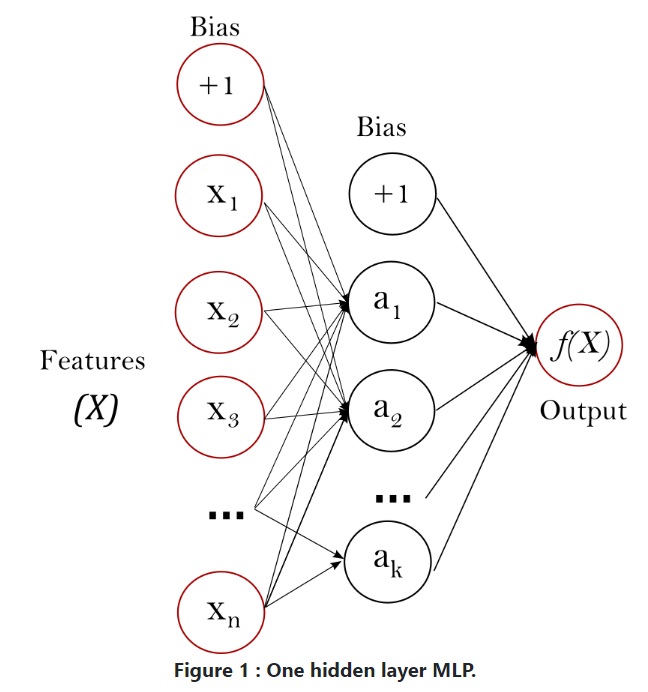

The leftmost layer, known as the input layer, consists of a set of neurons 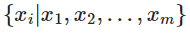 representing the input features.

Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation image.png, followed by a non-linear activation function image.png - like the hyperbolic tan function.

The output layer receives the values from the last hidden layer and transforms them into output values.

The module contains the public attributes *coefs_* and *intercepts_*.

    *coefs_* is a list of weight matrices, where weight matrix at index  represents the weights between layer *i* and *i+1* layer .

    *intercepts_* is a list of bias vectors, where the vector at index *i* represents the bias values added to layer *i+1*.

The advantages of Multi-layer Perceptron are:

    Capability to learn non-linear models.

    Capability to learn models in real-time (on-line learning) using partial_fit.

The disadvantages of Multi-layer Perceptron (MLP) include:

    MLP with hidden layers have a non-convex loss function where there exists more than one local minimum.
    Therefore different random weight initializations can lead to different validation accuracy.

    MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.

    MLP is sensitive to feature scaling.

###  sklearn.neural_network.MLPClassifier

Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

**class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', , solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)**

**Parameters:**

    hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith hidden layer.

    activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
    Activation function for the hidden layer.

        ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x

        ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

        ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).

        ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

    solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
    The solver for weight optimization.

        ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.

        ‘sgd’ refers to stochastic gradient descent.

        ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

      Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score.
      For small datasets, however, ‘lbfgs’ can converge faster and perform better.

    alphafloat, default=0.0001
    Strength of the L2 regularization term.
    The L2 regularization term is divided by the sample size when added to the loss.

    batch_sizeint, default=’auto’
    Size of minibatches for stochastic optimizers.
    If the solver is ‘lbfgs’, the classifier will not use minibatch.
    When set to “auto”, batch_size=min(200, n_samples).

    learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
    Learning rate schedule for weight updates.

        ‘constant’ is a constant learning rate given by ‘learning_rate_init’.

        ‘invscaling’ gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)

        ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing.
        Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.

    Only used when solver='sgd'.

    learning_rate_init : float, default=0.001
    The initial learning rate used. It controls the step-size in updating the weights.
    Only used when solver=’sgd’ or ‘adam’.

    power_t : float, default=0.5
    The exponent for inverse scaling learning rate.
    It is used in updating effective learning rate when the learning_rate is set to ‘invscaling’.
    Only used when solver=’sgd’.

    max_iter : int, default=200
    Maximum number of iterations.
    The solver iterates until convergence (determined by ‘tol’) or this number of iterations.
    For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

    shuffle : bool, default=True
    Whether to shuffle samples in each iteration.
    Only used when solver=’sgd’ or ‘adam’.

    random_state : int, RandomState instance, default=None
    Determines random number generation for weights and bias initialization, train-test split if early stopping is used, and batch sampling when solver=’sgd’ or ‘adam’.
    Pass an int for reproducible results across multiple function calls.

    tol : float, default=1e-4
    Tolerance for the optimization.
    When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to ‘adaptive’, convergence is considered to be reached and training stops.

    verbose : bool, default=False
    Whether to print progress messages to stdout.

    warm_start : bool, default=False
    When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.

    momentumfloat, default=0.9
    Momentum for gradient descent update. Should be between 0 and 1. Only used when solver=’sgd’.

    nesterovs_momentum : bool, default=True
    Whether to use Nesterov’s momentum.
    Only used when solver=’sgd’ and momentum > 0.

    early_stopping : bool, default=False
    Whether to use early stopping to terminate training when validation score is not improving.
    If set to true, it will automatically set aside 10% of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs.
    The split is stratified, except in a multilabel setting.
    If early stopping is False, then the training stops when the training loss does not improve by more than tol for n_iter_no_change consecutive passes over the training set.
    Only effective when solver=’sgd’ or ‘adam’.

    validation_fraction : float, default=0.1
    The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1.
    Only used if early_stopping is True.

    beta_1 : float, default=0.9
    Exponential decay rate for estimates of first moment vector in adam, should be in [0, 1).
    Only used when solver=’adam’.

    beta_2 : float, default=0.999
    Exponential decay rate for estimates of second moment vector in adam, should be in [0, 1).
    Only used when solver=’adam’.

    epsilon : float, default=1e-8
    Value for numerical stability in adam.
    Only used when solver=’adam’.

    n_iter_no_change : int, default=10
    Maximum number of epochs to not meet tol improvement.
    Only effective when solver=’sgd’ or ‘adam’.

    max_fun : int, default=15000
    Only used when solver=’lbfgs’.
    Maximum number of loss function calls.
    The solver iterates until convergence (determined by ‘tol’), number of iterations reaches max_iter, or this number of loss function calls.
    Note that number of loss function calls will be greater than or equal to the number of iterations for the MLPClassifier.

**Attributes:**

    classes : ndarray or list of ndarray of shape (n_classes,)
    Class labels for each output.

    loss : float
    The current loss computed with the loss function.

    best_loss : float or None
    The minimum loss reached by the solver throughout fitting.
    If early_stopping=True, this attribute is set to None.
    Refer to the best_validation_score_ fitted attribute instead.

    loss_curve : list of shape (n_iter_,)
    The ith element in the list represents the loss at the ith iteration.

    validation_scores : list of shape (n_iter_,) or None
    The score at each iteration on a held-out validation set. The score reported is the accuracy score.
    Only available if early_stopping=True, otherwise the attribute is set to None.

    best_validation_score : float or None
    The best validation score (i.e. accuracy score) that triggered the early stopping.
    Only available if early_stopping=True, otherwise the attribute is set to None.

    t : int
    The number of training samples seen by the solver during fitting.

    coefs : list of shape (n_layers - 1,)
    The ith element in the list represents the weight matrix corresponding to layer i.

    intercepts : list of shape (n_layers - 1,)
    The ith element in the list represents the bias vector corresponding to layer i + 1.

    n_features_in : int
    Number of features seen during fit.

    feature_names_in : ndarray of shape (n_features_in_,)
    Names of features seen during fit. Defined only when X has feature names that are all strings.

    n_iter : int
    The number of iterations the solver has run.

    n_layers : int
    Number of layers.

    n_outputs : int
    Number of outputs.

    out_activation : str
    Name of the output activation function.

**Methods**

    fit(X, y)
    Fit the model to data matrix X and target(s) y.

    get_metadata_routing()
    Get metadata routing of this object.

    get_params([deep])
    Get parameters for this estimator.

    partial_fit(X, y[, classes])
    Update the model with a single iteration over the given data.

    predict(X)
    Predict using the multi-layer perceptron classifier.

    predict_log_proba(X)
    Return the log of probability estimates.

    predict_proba(X)
    Probability estimates.

    score(X, y[, sample_weight])
    Return the mean accuracy on the given test data and labels.

    set_params(**params)
    Set the parameters of this estimator.

    set_partial_fit_request(*[, classes])
    Request metadata passed to the partial_fit method.

    set_score_request(*[, sample_weight])
    Request metadata passed to the score method.

In [ ]:
#  Defining a classifier clf of type MLPClassifier
clf=MLPClassifier()

In [ ]:
#  Using training files x_train and y_train to adjust the model
clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
# Using .score estimator to get the accuracy of the model using train datasets
clf.score(x_test,y_test)

0.94

In [ ]:
# Using the predict method to estimate the y outputs based on the x_test dataset
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1])

###  Accuracy score

The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.

In multilabel classification, the function returns the subset accuracy.

If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

If image.png is the predicted value of the *i-th* sample and image.png is the corresponding true value, then the fraction of correct predictions over image.png is defined as

 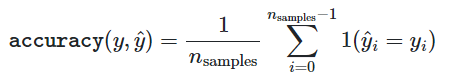

where 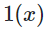 is the indicator function.

###  Confusion Matrix

The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class.

By definition, entry *i,j* in a confusion matrix is the number of observations actually in group *i*, but predicted to be in group *j*.

*ConfusionMatrixDisplay* can be used to visually represent a confusion matrix

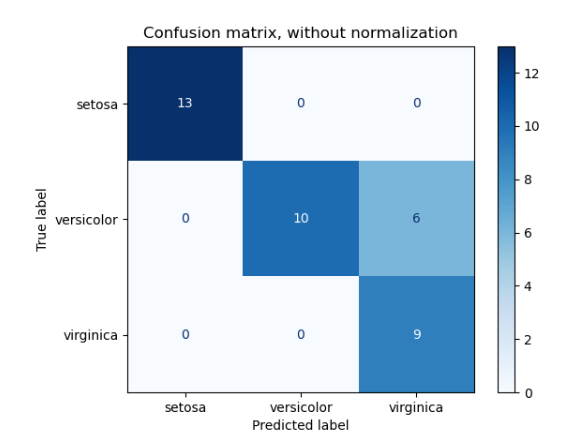

###   Preciaon, Recall and F1-Score

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced.

In information retrieval, *precision* is a measure of result relevancy, while *recall* is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold.

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels.

A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels.

An ideal system with high precision and high recall will return many results, with all results labeled correctly.

**Precision** (*P*) is defined as the number of true positives (*Tp*) over the number of true positives plus the number of false positives (*Fp*).

 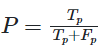

**Recall** (*R*) is defined as the number of true positives (*Tp*) over the number of true positives plus the number of false negatives (*Fn*).

 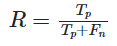

These quantities are also related to the (*F1*) score, which is defined as the harmonic mean of precision and recall.

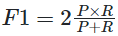

Note that the precision may not decrease with recall.

The definition of precision 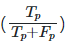 shows that lowering the threshold of a classifier may increase the denominator, by increasing the number of results returned.

If the threshold was previously set too high, the new results may all be true positives, which will increase precision.

If the previous threshold was about right or too low, further lowering the threshold will introduce false positives, decreasing precision.

Recall is defined as

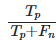, where *Tp + Fn*  does not depend on the classifier threshold.

This means that lowering the classifier threshold may increase recall, by increasing the number of true positive results.

It is also possible that lowering the threshold may leave recall unchanged, while the precision fluctuates.

The relationship between recall and precision can be observed in the stairstep area of the plot - at the edges of these steps a small change in the threshold considerably reduces precision, with only a minor gain in recall.

In [ ]:
# Using accuracy_score to evaluate model performance
accuracy=accuracy_score(y_test, y_pred)
accuracy

0.94

In [ ]:
# Determining confusion matrix values based on real and predicted values
matriz=confusion_matrix(y_test, y_pred)
matriz

array([[37,  0],
       [ 3, 10]])

In [ ]:
# Using recall score to evaluate model performance
recall=recall_score(y_test, y_pred)
recall

0.7692307692307693

In [ ]:
# Using f1_score to evaluate model performance
f1=f1_score(y_test, y_pred)
f1

0.8695652173913044